In [5]:
%pip install pandas 
import pandas as pd 
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
column_names = ['user_id','product_id','rating','timestamp']
df = pd.read_csv(r"E:\e-commerce-recommendation-system\ratings_Electronics.csv",names=column_names,nrows=200000)

In [7]:
print("shape of dataset: ",df.shape)
print("first few rows: ")
df.head()

shape of dataset:  (200000, 4)
first few rows: 


,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [8]:
# checking the missing values 

df.isnull().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

In [9]:
# checking for duplicate values 

print(df.duplicated().sum())

0


In [10]:
# counting the unique users 

print("unique users :",df['user_id'].nunique())

# unique products 

print("unique products :",df['product_id'].nunique())


unique users : 173349
unique products : 13131


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


C:\Users\anshs\AppData\Local\Temp\ipykernel_9548\2109331924.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='rating',palette='magma')


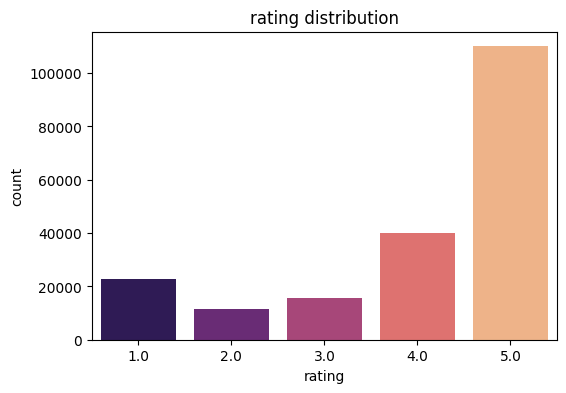

In [11]:
# rating distribution
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='rating',palette='magma')
plt.title('rating distribution')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

C:\Users\anshs\AppData\Local\Temp\ipykernel_9548\948485554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values,y=top_products.index,palette='magma')


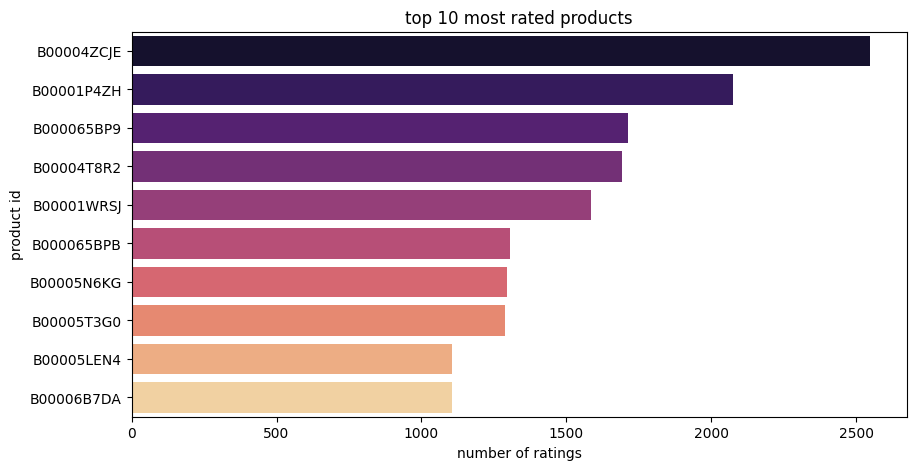

In [12]:
# most rated products 

top_products = df['product_id'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values,y=top_products.index,palette='magma')
plt.title('top 10 most rated products')
plt.xlabel('number of ratings')
plt.ylabel('product id')
plt.show()


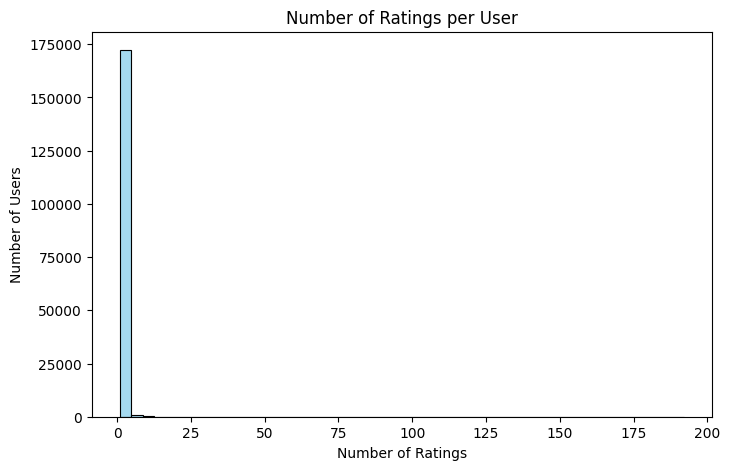

In [13]:
# rating per user distribution

rating_per_user = df.groupby('user_id').size()

plt.figure(figsize=(8,5))
sns.histplot(rating_per_user, bins=50, log_scale=(False, False), color='skyblue')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

In [14]:
# data filtering 
# removing the users who rated less than 3 products 
# and removing the products with less than rating of 5 

user_counts = df['user_id'].value_counts()
df=df[df['user_id'].isin(user_counts[user_counts>=3].index)]


product_counts = df['product_id'].value_counts()
df = df[df['product_id'].isin(product_counts[product_counts>=5].index)]

print("filtered dataset shape:",df.shape)
print("unique users",df['user_id'].nunique())
print("unique products",df['product_id'].nunique())

filtered dataset shape: (11309, 4)
unique users 4080
unique products 962


In [15]:
# popularity based recommendation 

product_stats= df.groupby('product_id').agg({'rating':['mean','count']}).reset_index()

# renaming the columns 
product_stats.columns = ['product_id','avg_rating','rating_count']

top_n = product_stats.sort_values(by='rating_count',ascending=False).head(10)

print(top_n)

     product_id  avg_rating  rating_count
202  B00004SB92    4.430303           165
371  B00004ZCJE    4.275000           160
457  B00005ARK3    3.935185           108
907  B00006HYKM    3.945946            74
836  B00006B7DA    4.246377            69
516  B00005LEN4    4.764706            68
422  B000056SSM    3.558824            68
766  B000067RT6    4.843750            64
619  B00005T3G0    4.730159            63
229  B00004T8R2    4.193548            62


C:\Users\anshs\AppData\Local\Temp\ipykernel_9548\3066311573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='product_id', data=top_n, palette='coolwarm')


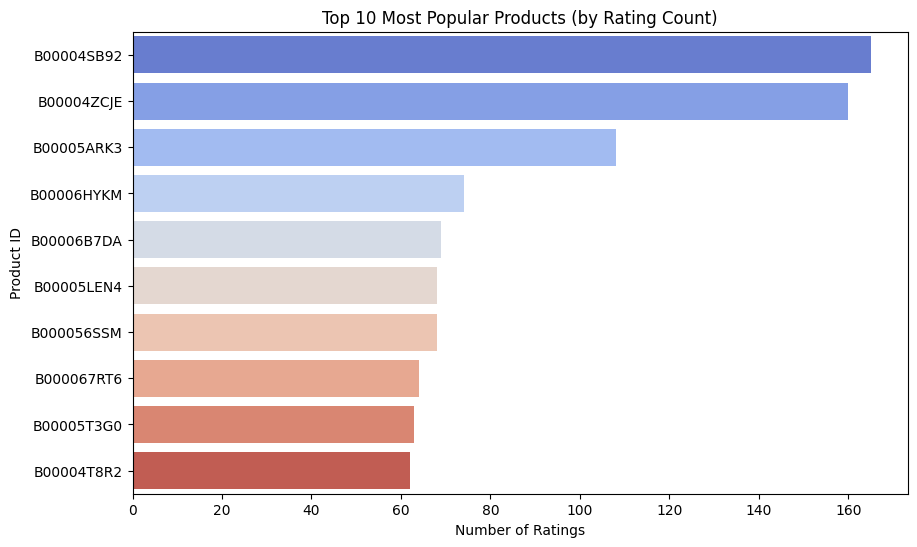

In [16]:

plt.figure(figsize=(10,6))
sns.barplot(x='rating_count', y='product_id', data=top_n, palette='coolwarm')
plt.title('Top 10 Most Popular Products (by Rating Count)')
plt.xlabel('Number of Ratings')
plt.ylabel('Product ID')
plt.show()


In [17]:
import numpy as np
print(np.__version__)  # should print 1.24.4


1.24.4


In [18]:
from surprise import Dataset,Reader,KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy


In [19]:
# Filter users with at least 50 ratings and products with at least 50 ratings
filtered_df = df[df['user_id'].isin(
    df['user_id'].value_counts()[df['user_id'].value_counts() >= 50].index)]
filtered_df = filtered_df[filtered_df['product_id'].isin(
    df['product_id'].value_counts()[df['product_id'].value_counts() >= 50].index)]

print(f"Filtered data shape: {filtered_df.shape}")


Filtered data shape: (6, 4)


In [20]:
# Create reader with rating scale
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise
data = Dataset.load_from_df(filtered_df[['user_id', 'product_id', 'rating']], reader)

# Split into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Define similarity options for User-based Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': True   # Set to False for Item-based
}

# Train the KNN model
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Predict on the testset
predictions = model.test(testset)

# Evaluate with RMSE
print("Model Evaluation (RMSE):")
accuracy.rmse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Model Evaluation (RMSE):
RMSE: 1.5811


1.5811388300841898

In [21]:
# Recommend Top-N Products to a User

from collections import defaultdict

def get_top_n_recommendations(predictions, n=10):
    # Map predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    # Sort and get top-n for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Get top 10 recommendations for each user
top_n = get_top_n_recommendations(predictions, n=10)

# Example: Display for a specific user
sample_user_id = list(top_n.keys())[0]
print(f"\nTop 10 recommendations for User {sample_user_id}:")
for i, (prod_id, rating) in enumerate(top_n[sample_user_id], 1):
    print(f"{i}. Product ID: {prod_id}, Predicted Rating: {rating:.2f}")



Top 10 recommendations for User A231WM2Z2JL0U3:
1. Product ID: B00005ARK3, Predicted Rating: 5.00
2. Product ID: B000056SSM, Predicted Rating: 5.00


In [22]:
# 1. Popularity-Based Recommendations
def get_popular_products(df, n=10):
    product_stats = df.groupby('product_id').agg({
        'rating': ['mean', 'count']
    }).reset_index()
    
    product_stats.columns = ['product_id', 'avg_rating', 'rating_count']
    top_n = product_stats.sort_values(by='rating_count', ascending=False).head(n)
    
    return top_n[['product_id', 'avg_rating', 'rating_count']]

# 2. Collaborative Filtering Recommendations
from collections import defaultdict

def get_top_n_recommendations(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# 3. Unified Recommender Function
def recommend_products(user_id, trained_model, trainset, full_predictions, original_df, n=10):
    if user_id in trainset._raw2inner_id_users:
        print(f" Personalized recommendations for User ID: {user_id}")
        top_n = get_top_n_recommendations(full_predictions, n=n)
        if user_id in top_n:
            for i, (iid, rating) in enumerate(top_n[user_id], 1):
                print(f"{i}. Product ID: {iid} | Predicted Rating: {rating:.2f}")
        else:
            print("User has no recommendations based on collaborative filtering.")
    else:
        print(f"New user detected! Showing Popular Products")
        top_popular = get_popular_products(original_df, n=n)
        for i, row in top_popular.iterrows():
            print(f"{i+1}. Product ID: {row['product_id']} | Avg Rating: {row['avg_rating']:.2f} | Rating Count: {row['rating_count']}")


In [23]:
# sample

# Choose a user
existing_user = list(trainset._raw2inner_id_users.keys())[0]
new_user = "new_user_123"

# Recommend for existing user
recommend_products(existing_user, model, trainset, predictions, filtered_df, n=5)

# Recommend for new user
recommend_products(new_user, model, trainset, predictions, filtered_df, n=5)


 Personalized recommendations for User ID: A231WM2Z2JL0U3
1. Product ID: B00005ARK3 | Predicted Rating: 5.00
2. Product ID: B000056SSM | Predicted Rating: 5.00
New user detected! Showing Popular Products
1. Product ID: B00003G1RG | Avg Rating: 5.00 | Rating Count: 1
2. Product ID: B00004SB92 | Avg Rating: 5.00 | Rating Count: 1
3. Product ID: B00004VX3T | Avg Rating: 5.00 | Rating Count: 1
4. Product ID: B000056SSM | Avg Rating: 3.00 | Rating Count: 1
5. Product ID: B00005ARK3 | Avg Rating: 4.00 | Rating Count: 1


In [24]:
filtered_df.to_csv("filtered_df.csv", index=False)


In [25]:

def get_popular_products(df, top_n=5):
    product_stats = df.groupby('product_id').agg({
        'rating': ['mean', 'count']
    }).reset_index()
    
    product_stats.columns = ['product_id', 'mean_rating', 'rating_count']
    
    # Rank products by rating count (popularity) and then mean rating
    popular_products = product_stats.sort_values(
        by=['rating_count', 'mean_rating'], 
        ascending=False
    ).head(top_n)
    
    return popular_products[['product_id', 'mean_rating', 'rating_count']]

# Example: Popular products for new user
print("Popular Products for New Users:")
print(get_popular_products(df, top_n=5))


Popular Products for New Users:
     product_id  mean_rating  rating_count
202  B00004SB92     4.430303           165
371  B00004ZCJE     4.275000           160
457  B00005ARK3     3.935185           108
907  B00006HYKM     3.945946            74
836  B00006B7DA     4.246377            69


In [26]:

from surprise import KNNBasic, Dataset, Reader
import pandas as pd

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

trainset = data.build_full_trainset()

# Item-based collaborative filtering
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based
}
algo_item = KNNBasic(sim_options=sim_options)
algo_item.fit(trainset)

def get_similar_products(product_id, top_n=5):
    try:
        inner_id = algo_item.trainset.to_inner_iid(product_id)
    except ValueError:
        # Cold start for new product → fallback to popular products
        print(f"Product {product_id} not found. Showing popular products instead.")
        return get_popular_products(df, top_n)
    
    neighbors = algo_item.get_neighbors(inner_id, k=top_n)
    neighbor_products = [algo_item.trainset.to_raw_iid(inner_id) for inner_id in neighbors]
    
    return pd.DataFrame({'similar_product_id': neighbor_products})

# Example: Similar products for a given product ID
print("\nSimilar Products to B00004SB92:")
print(get_similar_products('B00004SB92', top_n=5))


Computing the cosine similarity matrix...
Done computing similarity matrix.

Similar Products to B00004SB92:
  similar_product_id
0         0972683275
1         1400532655
2         140053271X
3         1400599997
4         B000001OMA


In [27]:
def recommend(user_id=None, product_id=None, top_n=5):
    if user_id:
        if user_id not in df['user_id'].unique():
            print(f"User {user_id} not found. Showing popular products.")
            return get_popular_products(df, top_n)
        else:
            # Personalized recommendation logic (your existing CF code)
            print(f"User {user_id} found. Generating personalized recommendations...")
            # Here you can call your existing surprise prediction code
            return None
    
    if product_id:
        return get_similar_products(product_id, top_n)

# Example calls
print("\n--- New User Example ---")
print(recommend(user_id="random_new_user", top_n=5))

print("\n--- New Product Example ---")
print(recommend(product_id="random_new_product", top_n=5))


--- New User Example ---
User random_new_user not found. Showing popular products.
     product_id  mean_rating  rating_count
202  B00004SB92     4.430303           165
371  B00004ZCJE     4.275000           160
457  B00005ARK3     3.935185           108
907  B00006HYKM     3.945946            74
836  B00006B7DA     4.246377            69

--- New Product Example ---
Product random_new_product not found. Showing popular products instead.
     product_id  mean_rating  rating_count
202  B00004SB92     4.430303           165
371  B00004ZCJE     4.275000           160
457  B00005ARK3     3.935185           108
907  B00006HYKM     3.945946            74
836  B00006B7DA     4.246377            69


In [28]:
import pickle

# Save trained model
with open("item_based_cf_model.pkl", "wb") as f:
    pickle.dump(algo_item, f)

print("Model saved successfully!")


Model saved successfully!
